___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
(Waad and Noof)
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# These becuase we have many features, and we want to display all of them
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)


plt.rcParams["figure.figsize"] = (7,4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:
# import dataframes
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")


# merge dataframes
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

# Copy dataframe for manipulating
df_copy = df.copy()

In [5]:
df_copy

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,NaN,285,1392,335,223,1297,252,196,368,...,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.000
6064,1982,NaN,262,1324,301,202,1204,236,181,378,...,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.000
6065,1983,NaN,260,1334,318,213,1259,234,183,363,...,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.000
6066,1984,NaN,205,1293,302,199,1207,213,163,376,...,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.000


In [6]:
# Drop ID number since there is no benefit of it during modeling:
df_copy = df_copy.drop(["subjectid", "SubjectId", "Date"], axis=1)
df_copy

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,0,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,1,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,2,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,3,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,4,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,285,1392,335,223,1297,252,196,368,299,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
6064,1982,262,1324,301,202,1204,236,181,378,294,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
6065,1983,260,1334,318,213,1259,234,183,363,332,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
6066,1984,205,1293,302,199,1207,213,163,376,276,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


In [7]:
# Height and weight are repeated
## drop the self_reported
## Convert the unit
df_copy.loc[:,["weightkg", "Weightlbs", "Heightin","stature"]]
df_copy["weightkg"] = df_copy["weightkg"]/10
df_copy

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,0,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,1,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,2,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,3,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,4,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,285,1392,335,223,1297,252,196,368,299,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
6064,1982,262,1324,301,202,1204,236,181,378,294,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
6065,1983,260,1334,318,213,1259,234,183,363,332,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
6066,1984,205,1293,302,199,1207,213,163,376,276,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


In [8]:
#Installation it is about the place that the measurments ocour and we do not need it
df_copy = df_copy.drop(["Weightlbs", "Heightin", "Installation"], axis=1)
df_copy

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Gender,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,WritingPreference
0,0,266,1467,337,222,1347,253,202,401,369,...,Male,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,Right hand
1,1,233,1395,326,220,1293,245,193,394,338,...,Male,Regular Army,Combat Support,68W,New York,1,NaN,1,35,Left hand
2,2,287,1430,341,230,1327,256,196,427,408,...,Male,Regular Army,Combat Support,68W,New York,2,NaN,2,42,Left hand
3,3,234,1347,310,230,1239,262,199,401,359,...,Male,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,Right hand
4,4,250,1585,372,247,1478,267,224,435,356,...,Male,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,285,1392,335,223,1297,252,196,368,299,...,Female,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,Right hand
6064,1982,262,1324,301,202,1204,236,181,378,294,...,Female,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,Right hand
6065,1983,260,1334,318,213,1259,234,183,363,332,...,Female,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,Right hand
6066,1984,205,1293,302,199,1207,213,163,376,276,...,Female,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,Right hand


## Explore Data

In [9]:
df_copy.describe()

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age
count,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,...,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000
mean,1697.499,246.469,1406.161,327.374,224.891,1299.609,244.193,194.755,399.204,340.934,...,914.501,229.674,377.004,1031.501,79.709,169.003,830.060,17.515,1.615,29.761
std,1133.004,37.400,79.091,20.720,16.052,72.022,16.845,13.516,30.237,41.520,...,114.275,35.613,31.618,62.702,15.653,13.125,47.651,550.950,0.979,8.675
min,0.000,155.000,1115.000,249.000,156.000,1038.000,186.000,151.000,283.000,216.000,...,611.000,138.000,289.000,805.000,35.800,124.000,672.000,1.000,1.000,17.000
25%,758.000,219.000,1350.000,313.000,214.000,1249.000,232.000,185.000,376.000,311.000,...,829.000,203.000,355.000,988.000,68.200,159.000,797.000,1.000,1.000,23.000
50%,1516.500,242.000,1410.000,328.000,225.000,1302.000,245.000,195.000,404.000,341.000,...,907.000,226.000,375.000,1033.000,78.500,170.000,830.000,1.000,1.000,28.000
75%,2564.250,271.000,1462.000,341.250,235.000,1349.000,256.000,204.000,421.000,370.000,...,992.000,252.250,398.000,1076.000,89.600,179.000,863.000,2.000,2.000,36.000
max,4081.000,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,490.000,...,1379.000,406.000,494.000,1245.000,144.200,216.000,1009.000,42351.000,8.000,58.000


In [10]:
df_copy.describe(include="O").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [11]:
df_copy['WritingPreference'].value_counts()

Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64

In [12]:
df_copy['SubjectsBirthLocation']

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
6063             Texas
6064             Texas
6065             Texas
6066             Texas
6067             Texas
Name: SubjectsBirthLocation, Length: 6068, dtype: object

In [13]:
df_copy = df_copy.drop(["Ethnicity", "PrimaryMOS", "SubjectsBirthLocation", "SubjectNumericRace" ], axis=1)

# Ethnicity Because many missing values >50%
# "PrimaryMOS", "SubjectsBirthLocation" becuase have many unique values
# "SubjectNumericRace" it may mislead the conclusion [It is similar to the target

In [14]:
# Look for DODRace with >= 500 observations
df_copy.groupby("DODRace").count()

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,Age,WritingPreference
DODRace,,,,,,,,,,,,,,,,,,,,,
1,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,...,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792
2,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,...,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
3,679,679,679,679,679,679,679,679,679,679,...,679,679,679,679,679,679,679,679,679,679
4,188,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188
5,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
6,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
8,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [15]:
# #check if our data is palanced or not
# for column in df.columns:
#     # Use value_counts() to count the occurrences of each element in the column
#     column_counts = df[column].value_counts()

#     # Print the column name and its count
#     print(f"Column '{column}':")
#     print(column_counts)
#     print()#check if our data is palanced or not
# for column in df.columns:
#     # Use value_counts() to count the occurrences of each element in the column
#     column_counts = df[column].value_counts()

#     # Print the column name and its count
#     print(f"Column '{column}':")
#     print(column_counts)
#     print()

In [16]:
# Just DODRace with > 500 observations
df_copy = df_copy.query("DODRace in [1, 2, 3]")
df_copy.groupby("DODRace").count()
df_copy

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,DODRace,Age,WritingPreference
0,0,266,1467,337,222,1347,253,202,401,369,...,1054,81.500,175,853,Male,Regular Army,Combat Arms,1,41,Right hand
1,1,233,1395,326,220,1293,245,193,394,338,...,1054,72.600,167,815,Male,Regular Army,Combat Support,1,35,Left hand
2,2,287,1430,341,230,1327,256,196,427,408,...,1041,92.900,180,831,Male,Regular Army,Combat Support,2,42,Left hand
3,3,234,1347,310,230,1239,262,199,401,359,...,968,79.400,176,793,Male,Regular Army,Combat Service Support,1,31,Right hand
4,4,250,1585,372,247,1478,267,224,435,356,...,1245,94.600,188,954,Male,Regular Army,Combat Service Support,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,285,1392,335,223,1297,252,196,368,299,...,1002,83.200,162,836,Female,Army National Guard,Combat Support,3,51,Right hand
6064,1982,262,1324,301,202,1204,236,181,378,294,...,958,71.700,157,804,Female,Army National Guard,Combat Support,3,40,Right hand
6065,1983,260,1334,318,213,1259,234,183,363,332,...,970,76.200,159,774,Female,Army National Guard,Combat Support,2,40,Right hand
6066,1984,205,1293,302,199,1207,213,163,376,276,...,952,63.200,146,769,Female,Army National Guard,Combat Support,3,31,Right hand


In [17]:
# # Check missing value
# df_copy.isnull().sum()

Nulls = 0
for column in df_copy:

    # Check for null values in each column
    null_values = df_copy[column].isnull().sum()
    Nulls = null_values + Nulls


# # Set display options to show all columns
# pd.set_option('display.max_columns', None)

# Display the null values for each column
Nulls

0

In [18]:
# The is better to detect each missings with its cirrospending features

null_values = []

# Iterate over each column in the DataFrame
for col in df_copy.columns:
    # Calculate the number of null values in the column
    null_count = df_copy[col].isnull().sum()
    # Append the null count to the list
    null_values.append(null_count)

# Convert the list to a numpy array
null_array = np.array(null_values)

# Print the array of null values
print(null_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
# Check duplicates
df.duplicated().sum()

0

In [20]:
#Calculate the correlation matrix
correlation_matrix = df_copy.corr(numeric_only= True)

pd.set_option('display.max_rows', None)
correlation_matrix
# Display the correlation matrix with colors
# print(correlation_matrix.style.background_gradient(cmap='coolwarm'))


def color_red(val):

    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)

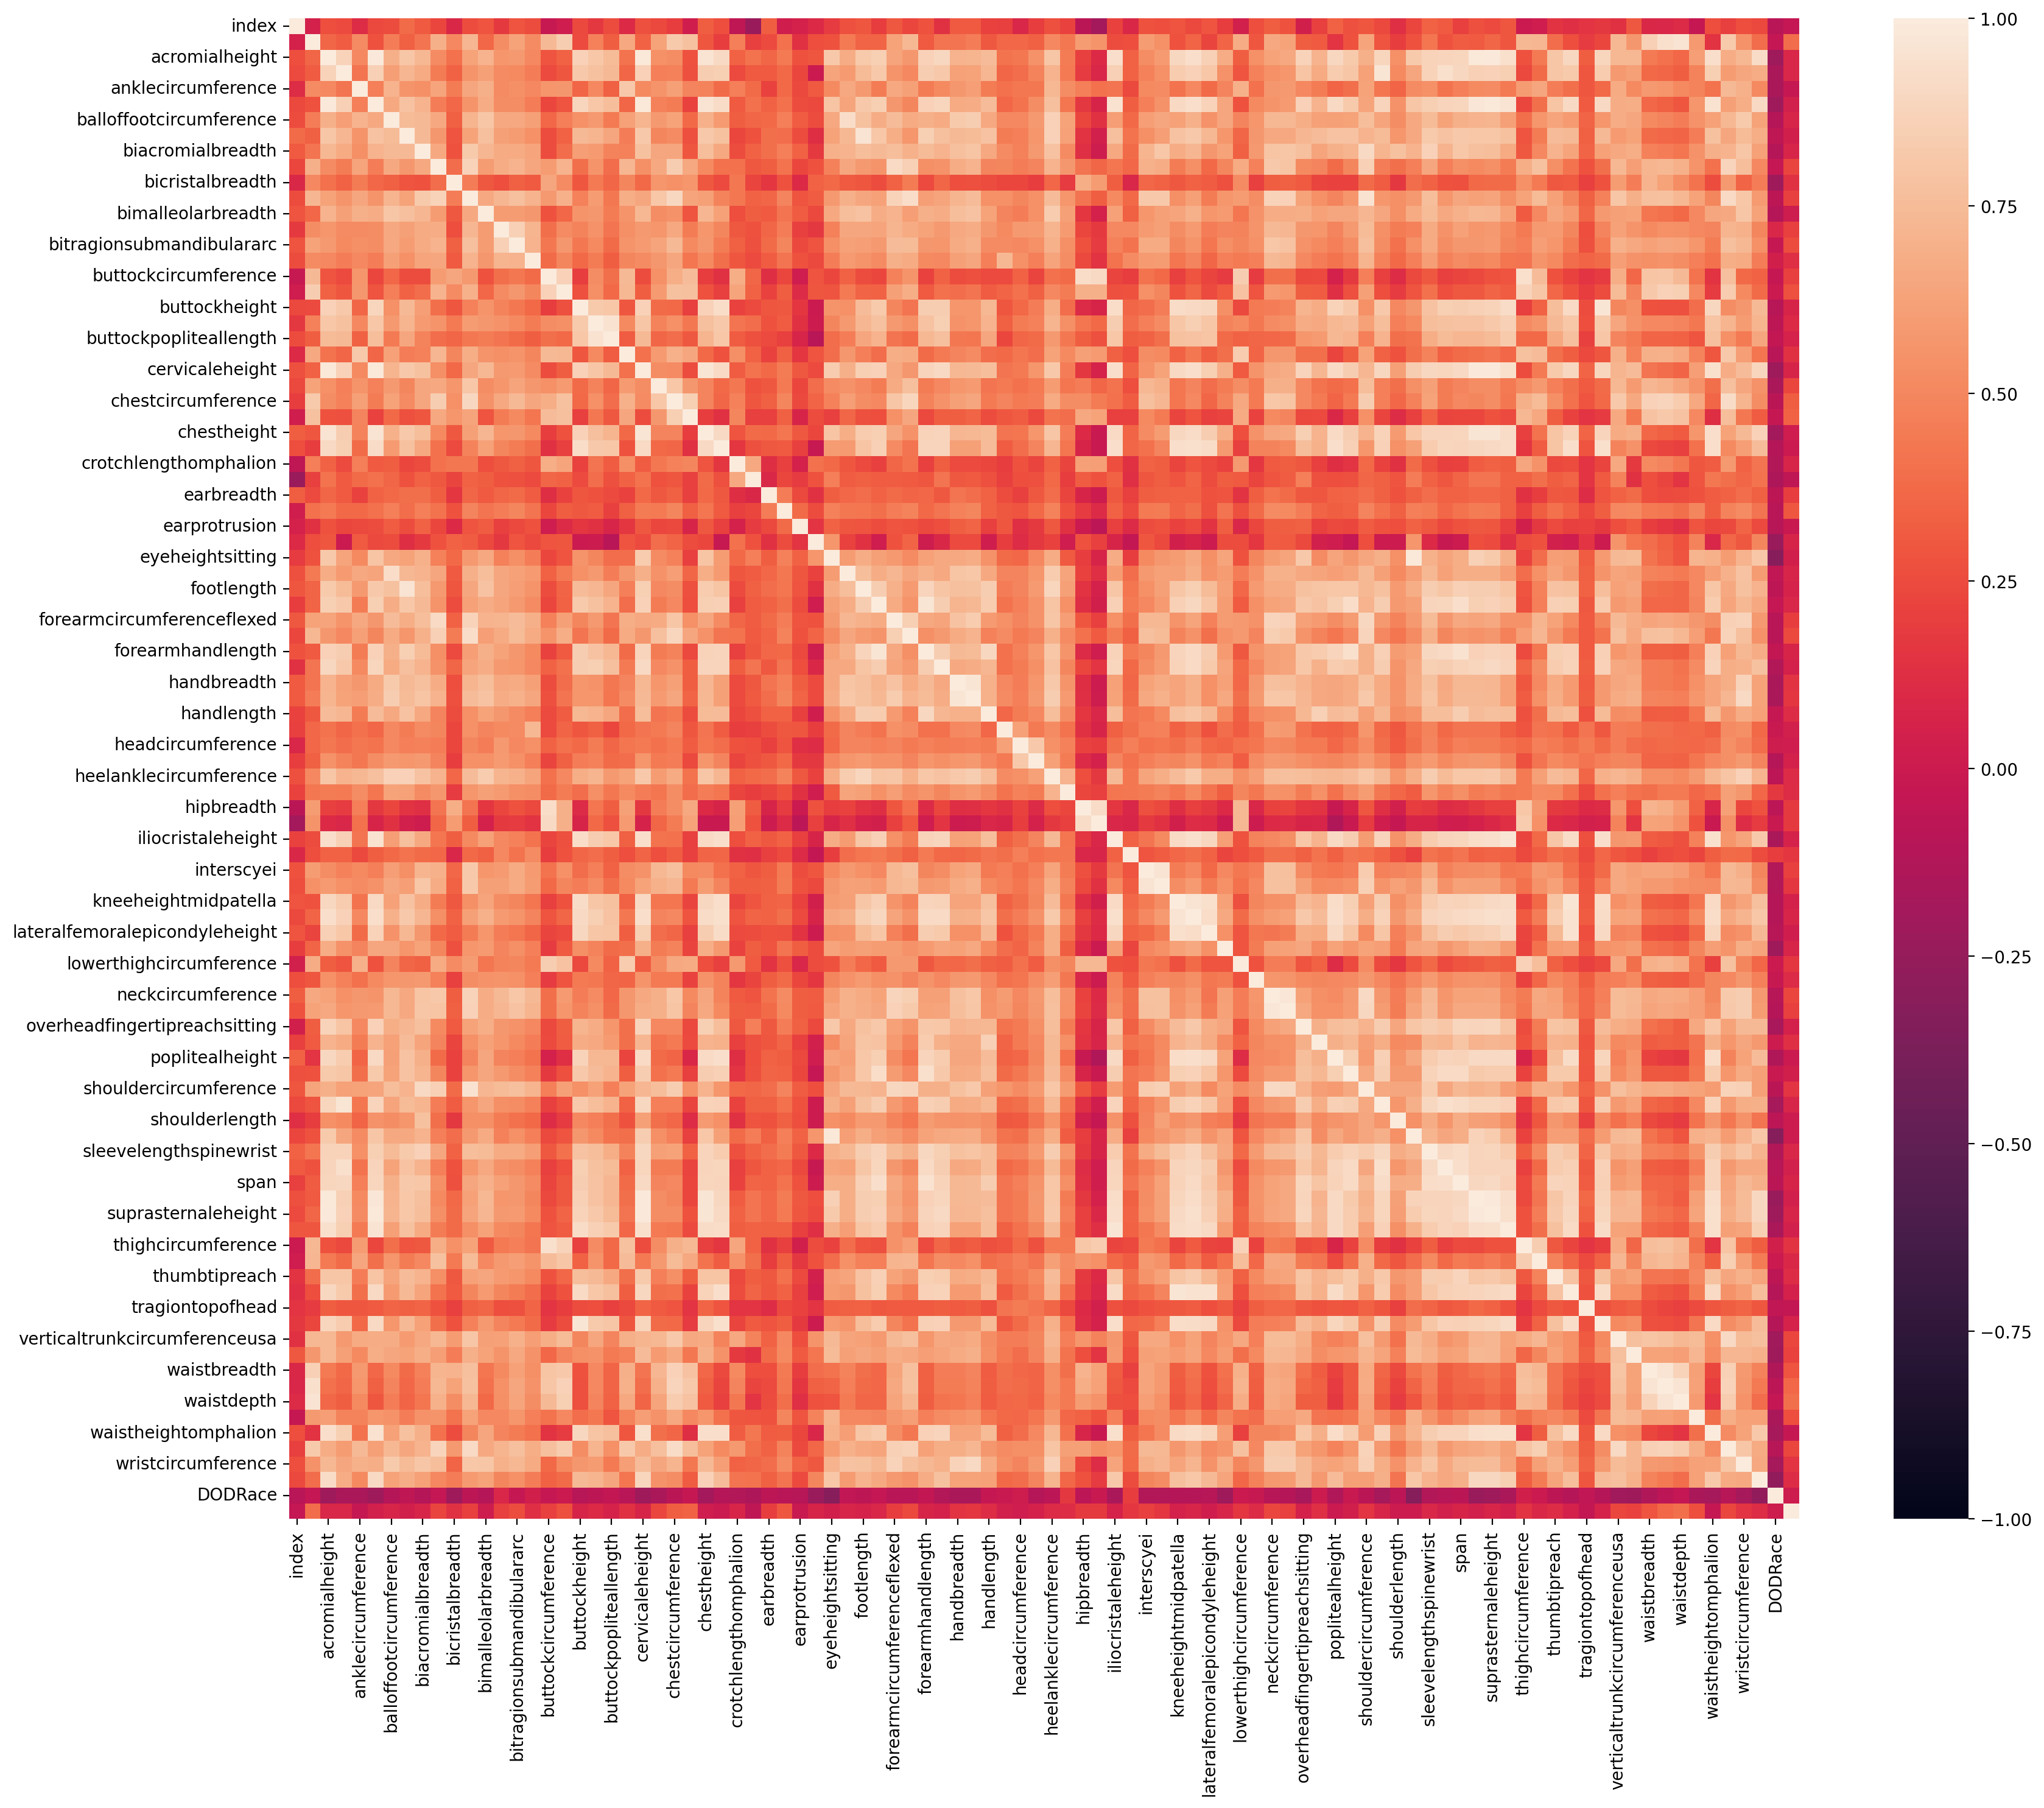

In [21]:
plt.figure(figsize=(20,16), dpi=200)
sns.heatmap(df_copy.corr(), vmin=-1, vmax=1);

## Waad

In [22]:
df_w1 = df_copy.copy()

In [23]:
df_w1.describe()

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age
count,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,...,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000
mean,1698.305,247.254,1408.630,328.072,225.202,1301.903,244.408,195.119,399.706,341.663,...,318.410,916.817,230.459,377.352,1033.591,80.098,169.308,831.335,1.460,29.776
std,1133.084,37.458,78.303,20.445,15.966,71.261,16.804,13.379,30.124,41.271,...,36.396,114.386,35.692,31.714,61.958,15.599,13.061,47.322,0.696,8.707
min,0.000,155.000,1146.000,249.000,156.000,1062.000,186.000,151.000,283.000,216.000,...,211.000,611.000,138.000,289.000,808.000,35.800,124.000,688.000,1.000,17.000
25%,764.000,220.000,1353.000,314.000,214.000,1252.000,233.000,186.000,377.000,312.000,...,292.000,831.000,204.000,355.000,990.000,68.600,159.000,798.000,1.000,23.000
50%,1512.000,243.000,1412.000,328.000,225.000,1304.000,245.000,196.000,404.000,342.000,...,316.000,910.000,226.000,376.000,1035.000,79.000,171.000,831.000,1.000,28.000
75%,2567.000,272.000,1464.000,342.000,235.000,1351.000,256.000,205.000,422.000,370.000,...,344.000,995.000,253.000,398.000,1077.000,90.000,179.000,864.000,2.000,36.000
max,4081.000,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,490.000,...,461.000,1379.000,406.000,494.000,1245.000,144.200,216.000,1009.000,3.000,58.000


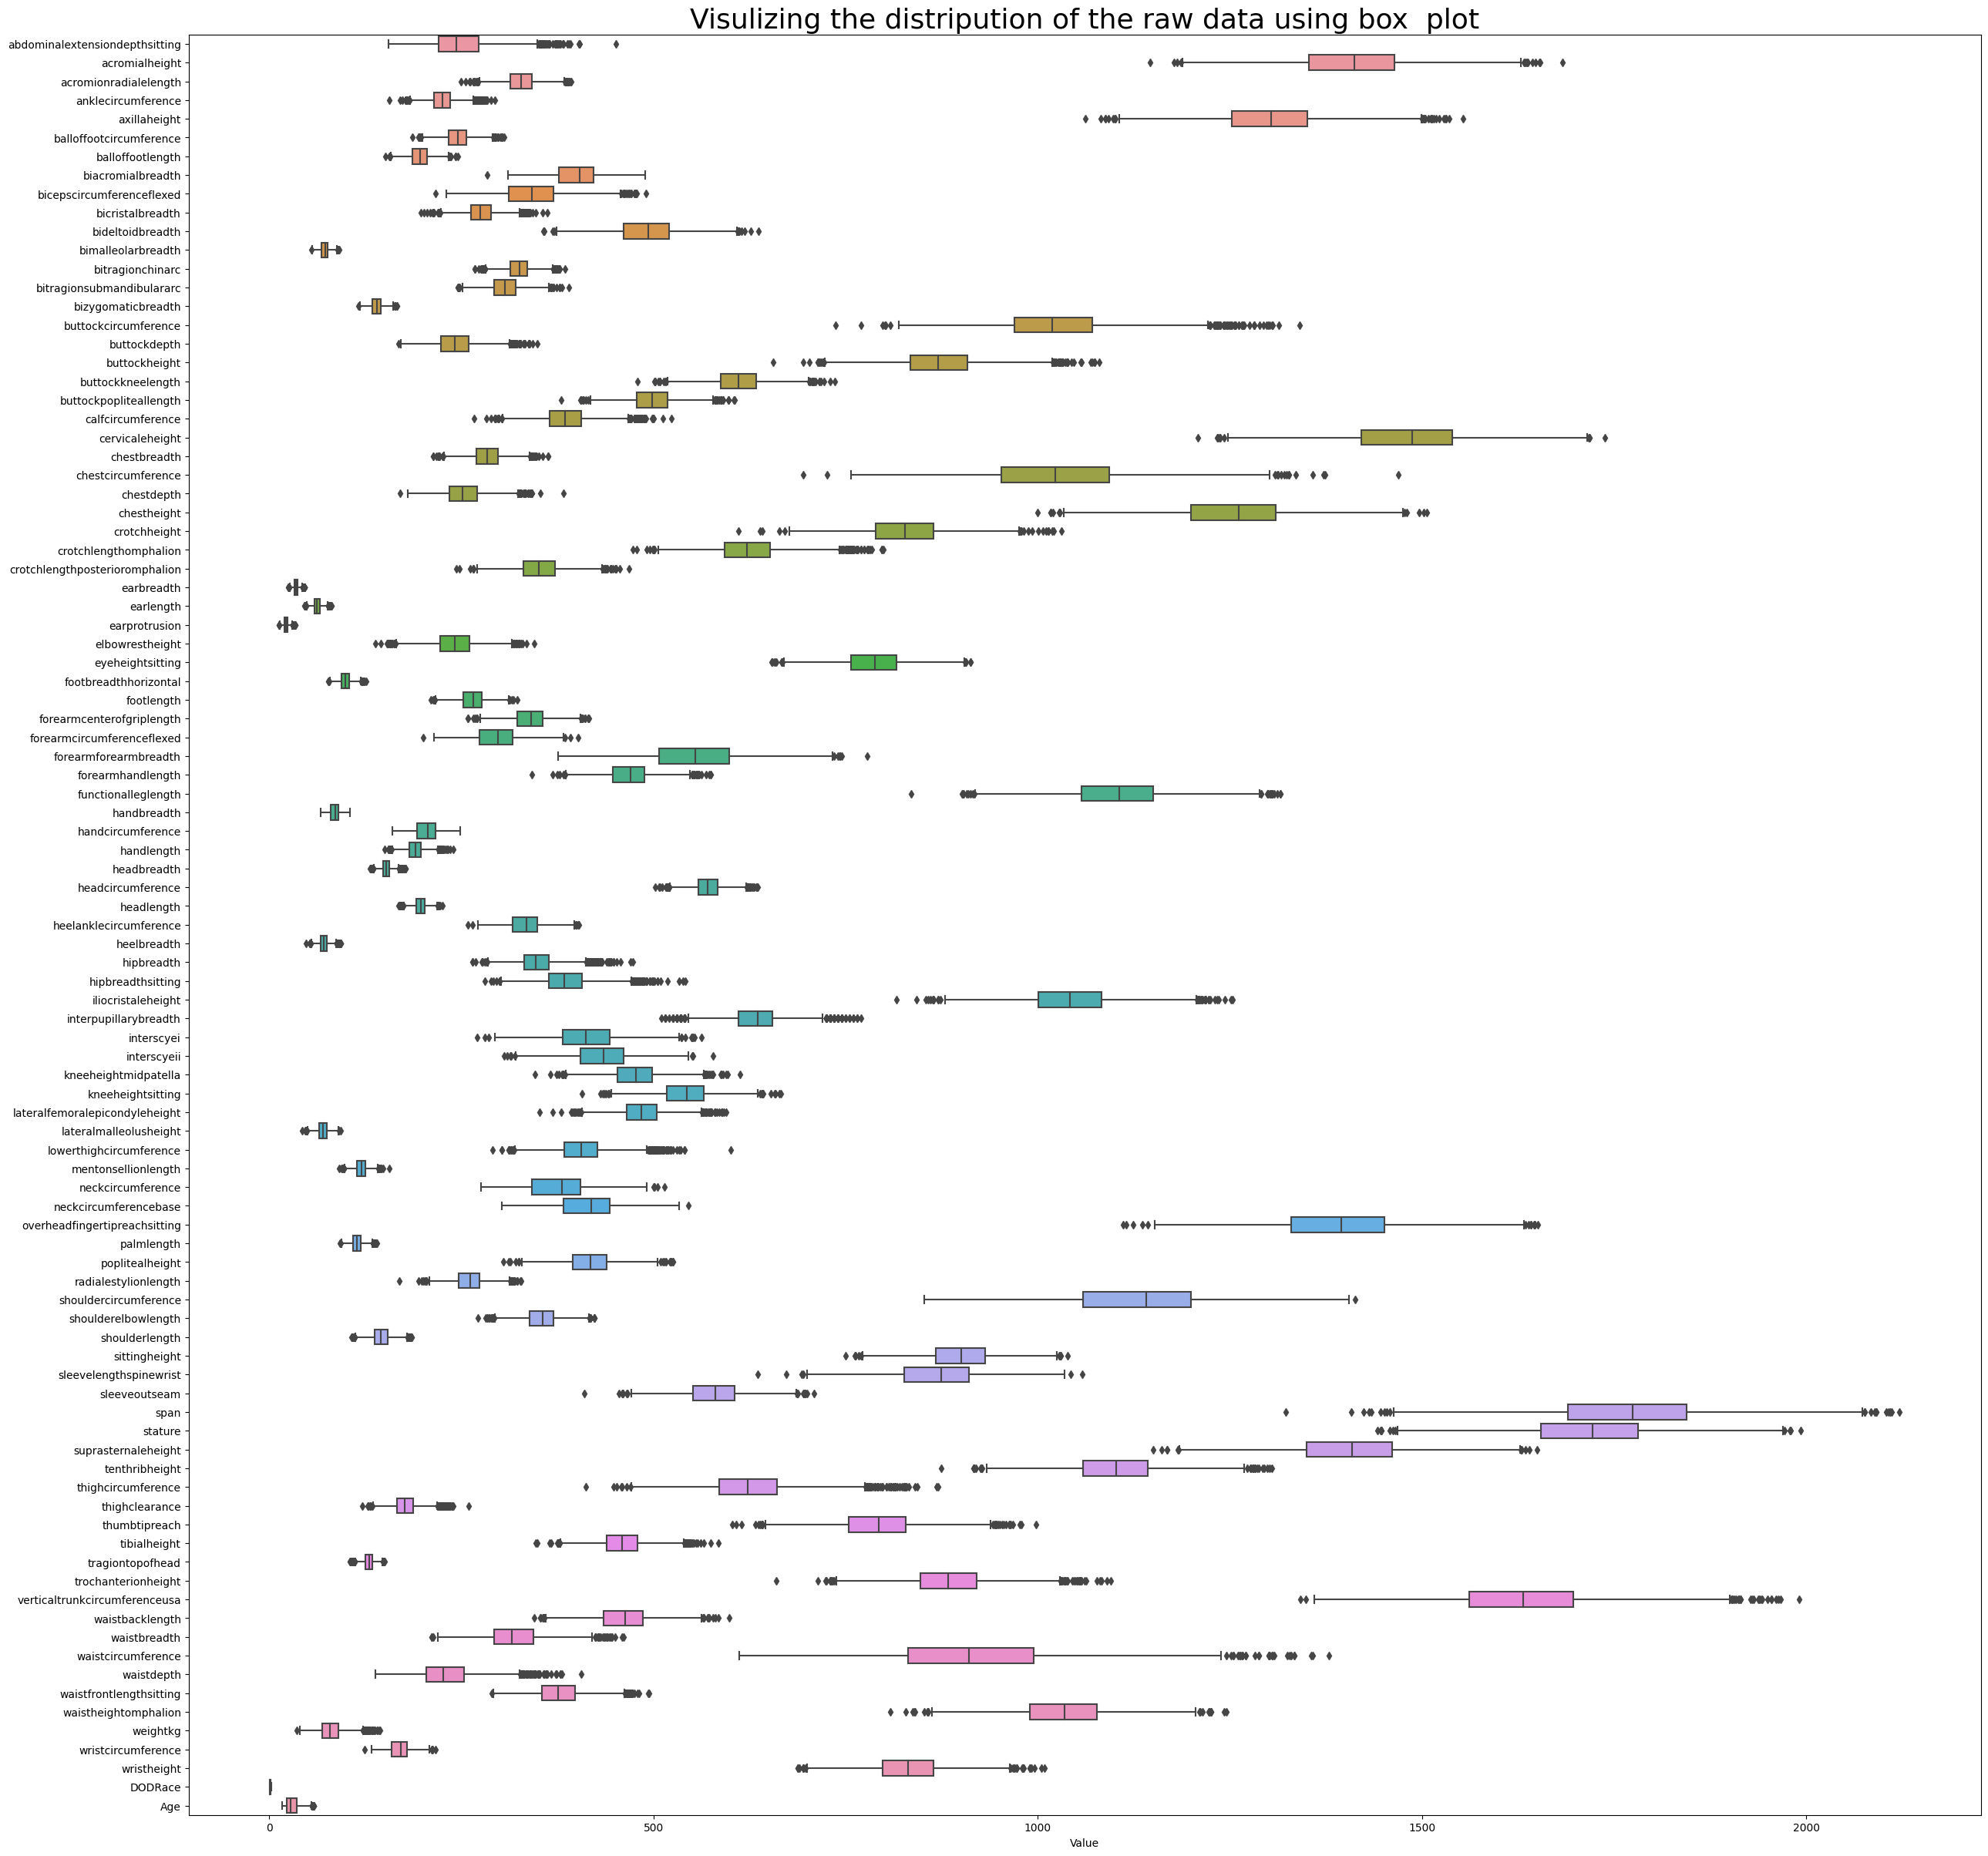

In [24]:
# Create a box plot for all features
plt.figure(figsize=(30,30))  # Adjust the figure size as needed
sns.boxplot(data=df_w1.iloc[:, 1:], orient="h")  # Horizontal box plot for all features
plt.title("Visulizing the distripution of the raw data using box  plot", fontsize=26)
plt.xlabel("Value")

# plt.savefig("box_plot_all_features.png")

plt.show()

In [27]:
df_w1.columns

Index(['index', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth

In [43]:
lower_body_measurements = [
    'anklecircumference',
    'balloffootcircumference',
    'balloffootlength',
    'bimalleolarbreadth',
    'bitragionchinarc',
    'bitragionsubmandibulararc',
    'bizygomaticbreadth',
    'calfcircumference',
    'footbreadthhorizontal',
    'footlength',
    'heelanklecircumference',
    'heelbreadth',
    'hipbreadth',
    'hipbreadthsitting',
    'lowerthighcircumference',
    'poplitealheight',
    'radialestylionlength',
    'tibialheight'
]

head_and_face_measurements = [
    'earbreadth',
    'earlength',
    'earprotrusion',
    'eyeheightsitting',
    'headbreadth',
    'headcircumference',
    'headlength'
]

shoulder_and_arm_measurements = [
    'acromialheight',
    'acromionradialelength',
    'biacromialbreadth',
    'bicepscircumferenceflexed',
    'bideltoidbreadth',
    'elbowrestheight',
    'forearmcenterofgriplength',
    'forearmcircumferenceflexed',
    'forearmforearmbreadth',
    'forearmhandlength',
    'shouldercircumference',
    'shoulderelbowlength',
    'shoulderlength',
    'thumbtipreach',
    'handbreadth',
    'handcircumference',
    'handlength',
    'overheadfingertipreachsitting',
    'palmlength',
    'sleevelengthspinewrist',
    'sleeveoutseam',
    'wristcircumference',
    'wristheight',
    'axillaheight'
]

chest_measurements = [
    'chestbreadth',
    'chestcircumference',
    'chestdepth',
    'chestheight',
    'suprasternaleheight'
]

waist_and_hip_measurements = [
    'buttockcircumference',
    'buttockdepth',
    'buttockheight',
    'buttockkneelength',
    'buttockpopliteallength',
    'bicristalbreadth',
    'iliocristaleheight',
    'crotchheight',
    'crotchlengthomphalion',
    'crotchlengthposterioromphalion',
    'waistbacklength',
    'waistbreadth',
    'waistcircumference',
    'waistdepth',
    'waistfrontlengthsitting',
    'waistheightomphalion',
    'abdominalextensiondepthsitting'
]

neck_and_head_measurements = [
    'cervicaleheight',
    'interpupillarybreadth',
    'interscyei',
    'interscyeii',
    'mentonsellionlength',
    'neckcircumference',
    'neckcircumferencebase',
    'headbreadth',
    'headcircumference',
    'headlength',
    'tragiontopofhead'
]

legs_measurements = [
    'functionalleglength',
    'thighcircumference',
    'thighclearance',
    'lateralfemoralepicondyleheight',
    'lateralmalleolusheight',
    'trochanterionheight',
    'kneeheightmidpatella',
    'kneeheightsitting'
]

trunk_measurements = [
    'sittingheight',
    'span',
    'stature',
    'tenthribheight',
    'verticaltrunkcircumferenceusa'
]


In [57]:
all_features = ['index', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
       'handcircumference', 'handlength', 'headbreadth', 'headcircumference',
       'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth',
       'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth',
       'interscyei', 'interscyeii', 'kneeheightmidpatella',
       'kneeheightsitting', 'lateralfemoralepicondyleheight',
       'lateralmalleolusheight', 'lowerthighcircumference',
       'mentonsellionlength', 'neckcircumference', 'neckcircumferencebase',
       'overheadfingertipreachsitting', 'palmlength', 'poplitealheight',
       'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength',
       'shoulderlength', 'sittingheight', 'sleevelengthspinewrist',
       'sleeveoutseam', 'span', 'stature', 'suprasternaleheight',
       'tenthribheight', 'thighcircumference', 'thighclearance',
       'thumbtipreach', 'tibialheight', 'tragiontopofhead',
       'trochanterionheight', 'verticaltrunkcircumferenceusa',
       'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth',
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'Gender', 'Component', 'Branch',
       'DODRace', 'Age', 'WritingPreference']

# Create a list of all subgroups
subgroups = [lower_body_measurements, head_and_face_measurements, shoulder_and_arm_measurements,
            chest_measurements, waist_and_hip_measurements, neck_and_head_measurements, legs_measurements, trunk_measurements]

# Flatten the list of subgroups to get all the elements in subgroups
elements_in_subgroups = [feature for subgroup in subgroups for feature in subgroup]

# Find elements that are not in any subgroups
elements_not_in_any_subgroup = [feature for feature in all_features if feature not in elements_in_subgroups]

print(elements_not_in_any_subgroup)


['index', 'weightkg', 'Gender', 'Component', 'Branch', 'DODRace', 'Age', 'WritingPreference']


In [66]:
# Create separate dataframes for each group of measurements
lower_body_df = df_w1[lower_body_measurements]
head_and_face_df = df_w1[head_and_face_measurements]
shoulder_and_arm_df = df_w1[shoulder_and_arm_measurements]
chest_df = df_w1[chest_measurements]
waist_and_hip_df = df_w1[waist_and_hip_measurements]
neck_and_head_df = df_w1[neck_and_head_measurements]
legs_df = df_w1[legs_measurements]
trunk_df = df_w1[trunk_measurements]
other_df = df_w1[elements_not_in_any_subgroup]

In [46]:
other_df.head()

,index,weightkg,Gender,Component,Branch,DODRace,Age,WritingPreference
0,0,81.500,Male,Regular Army,Combat Arms,1,41,Right hand
1,1,72.600,Male,Regular Army,Combat Support,1,35,Left hand
2,2,92.900,Male,Regular Army,Combat Support,2,42,Left hand
3,3,79.400,Male,Regular Army,Combat Service Support,1,31,Right hand
4,4,94.600,Male,Regular Army,Combat Service Support,2,21,Right hand


In [49]:
other_df.head()

,index,weightkg,Component,Branch,DODRace,Age,WritingPreference,Gender_Female,Gender_Male
0,0,81.500,Regular Army,Combat Arms,1,41,Right hand,0,1
1,1,72.600,Regular Army,Combat Support,1,35,Left hand,0,1
2,2,92.900,Regular Army,Combat Support,2,42,Left hand,0,1
3,3,79.400,Regular Army,Combat Service Support,1,31,Right hand,0,1
4,4,94.600,Regular Army,Combat Service Support,2,21,Right hand,0,1


In [54]:
other_df['Branch'].unique()

array(['Combat Arms', 'Combat Support', 'Combat Service Support'],
      dtype=object)

In [68]:
gender_mapping = {
    'Male': 0,
    'Female': 1
}
other_df['Gender'] = other_df['Gender'].map(gender_mapping)

component_mapping = {
    'Regular Army': 1,
    'Army National Guard': 2,
    'Army Reserve': 3
}
other_df['Component'] = other_df['Component'].map(component_mapping)


branch_mapping = {
    'Combat Arms': 1,
    'Combat Support': 2,
    'Combat Service Support': 3
}
other_df['Branch'] = other_df['Branch'].map(branch_mapping)

writing_mapping = {
    'Either hand (No preference)': 0,
    'Right hand':1,
    'Left hand': 2
}
other_df['WritingPreference'] = other_df['WritingPreference'].map(writing_mapping)

In [67]:
other_df['WritingPreference'] .unique()

array(['Right hand', 'Left hand', 'Either hand (No preference)'],
      dtype=object)

In [69]:
other_df.head()

,index,weightkg,Gender,Component,Branch,DODRace,Age,WritingPreference
0,0,81.500,0,1,1,1,41,1
1,1,72.600,0,1,2,1,35,2
2,2,92.900,0,1,2,2,42,2
3,3,79.400,0,1,3,1,31,1
4,4,94.600,0,1,3,2,21,1


In [70]:
other_df.describe()

,index,weightkg,Gender,Component,Branch,DODRace,Age,WritingPreference
count,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000
mean,1698.305,80.098,0.324,1.524,2.262,1.460,29.776,1.098
std,1133.084,15.599,0.468,0.567,0.846,0.696,8.707,0.329
min,0.000,35.800,0.000,1.000,1.000,1.000,17.000,0.000
25%,764.000,68.600,0.000,1.000,1.000,1.000,23.000,1.000
50%,1512.000,79.000,0.000,1.000,3.000,1.000,28.000,1.000
75%,2567.000,90.000,1.000,2.000,3.000,2.000,36.000,1.000
max,4081.000,144.200,1.000,3.000,3.000,3.000,58.000,2.000


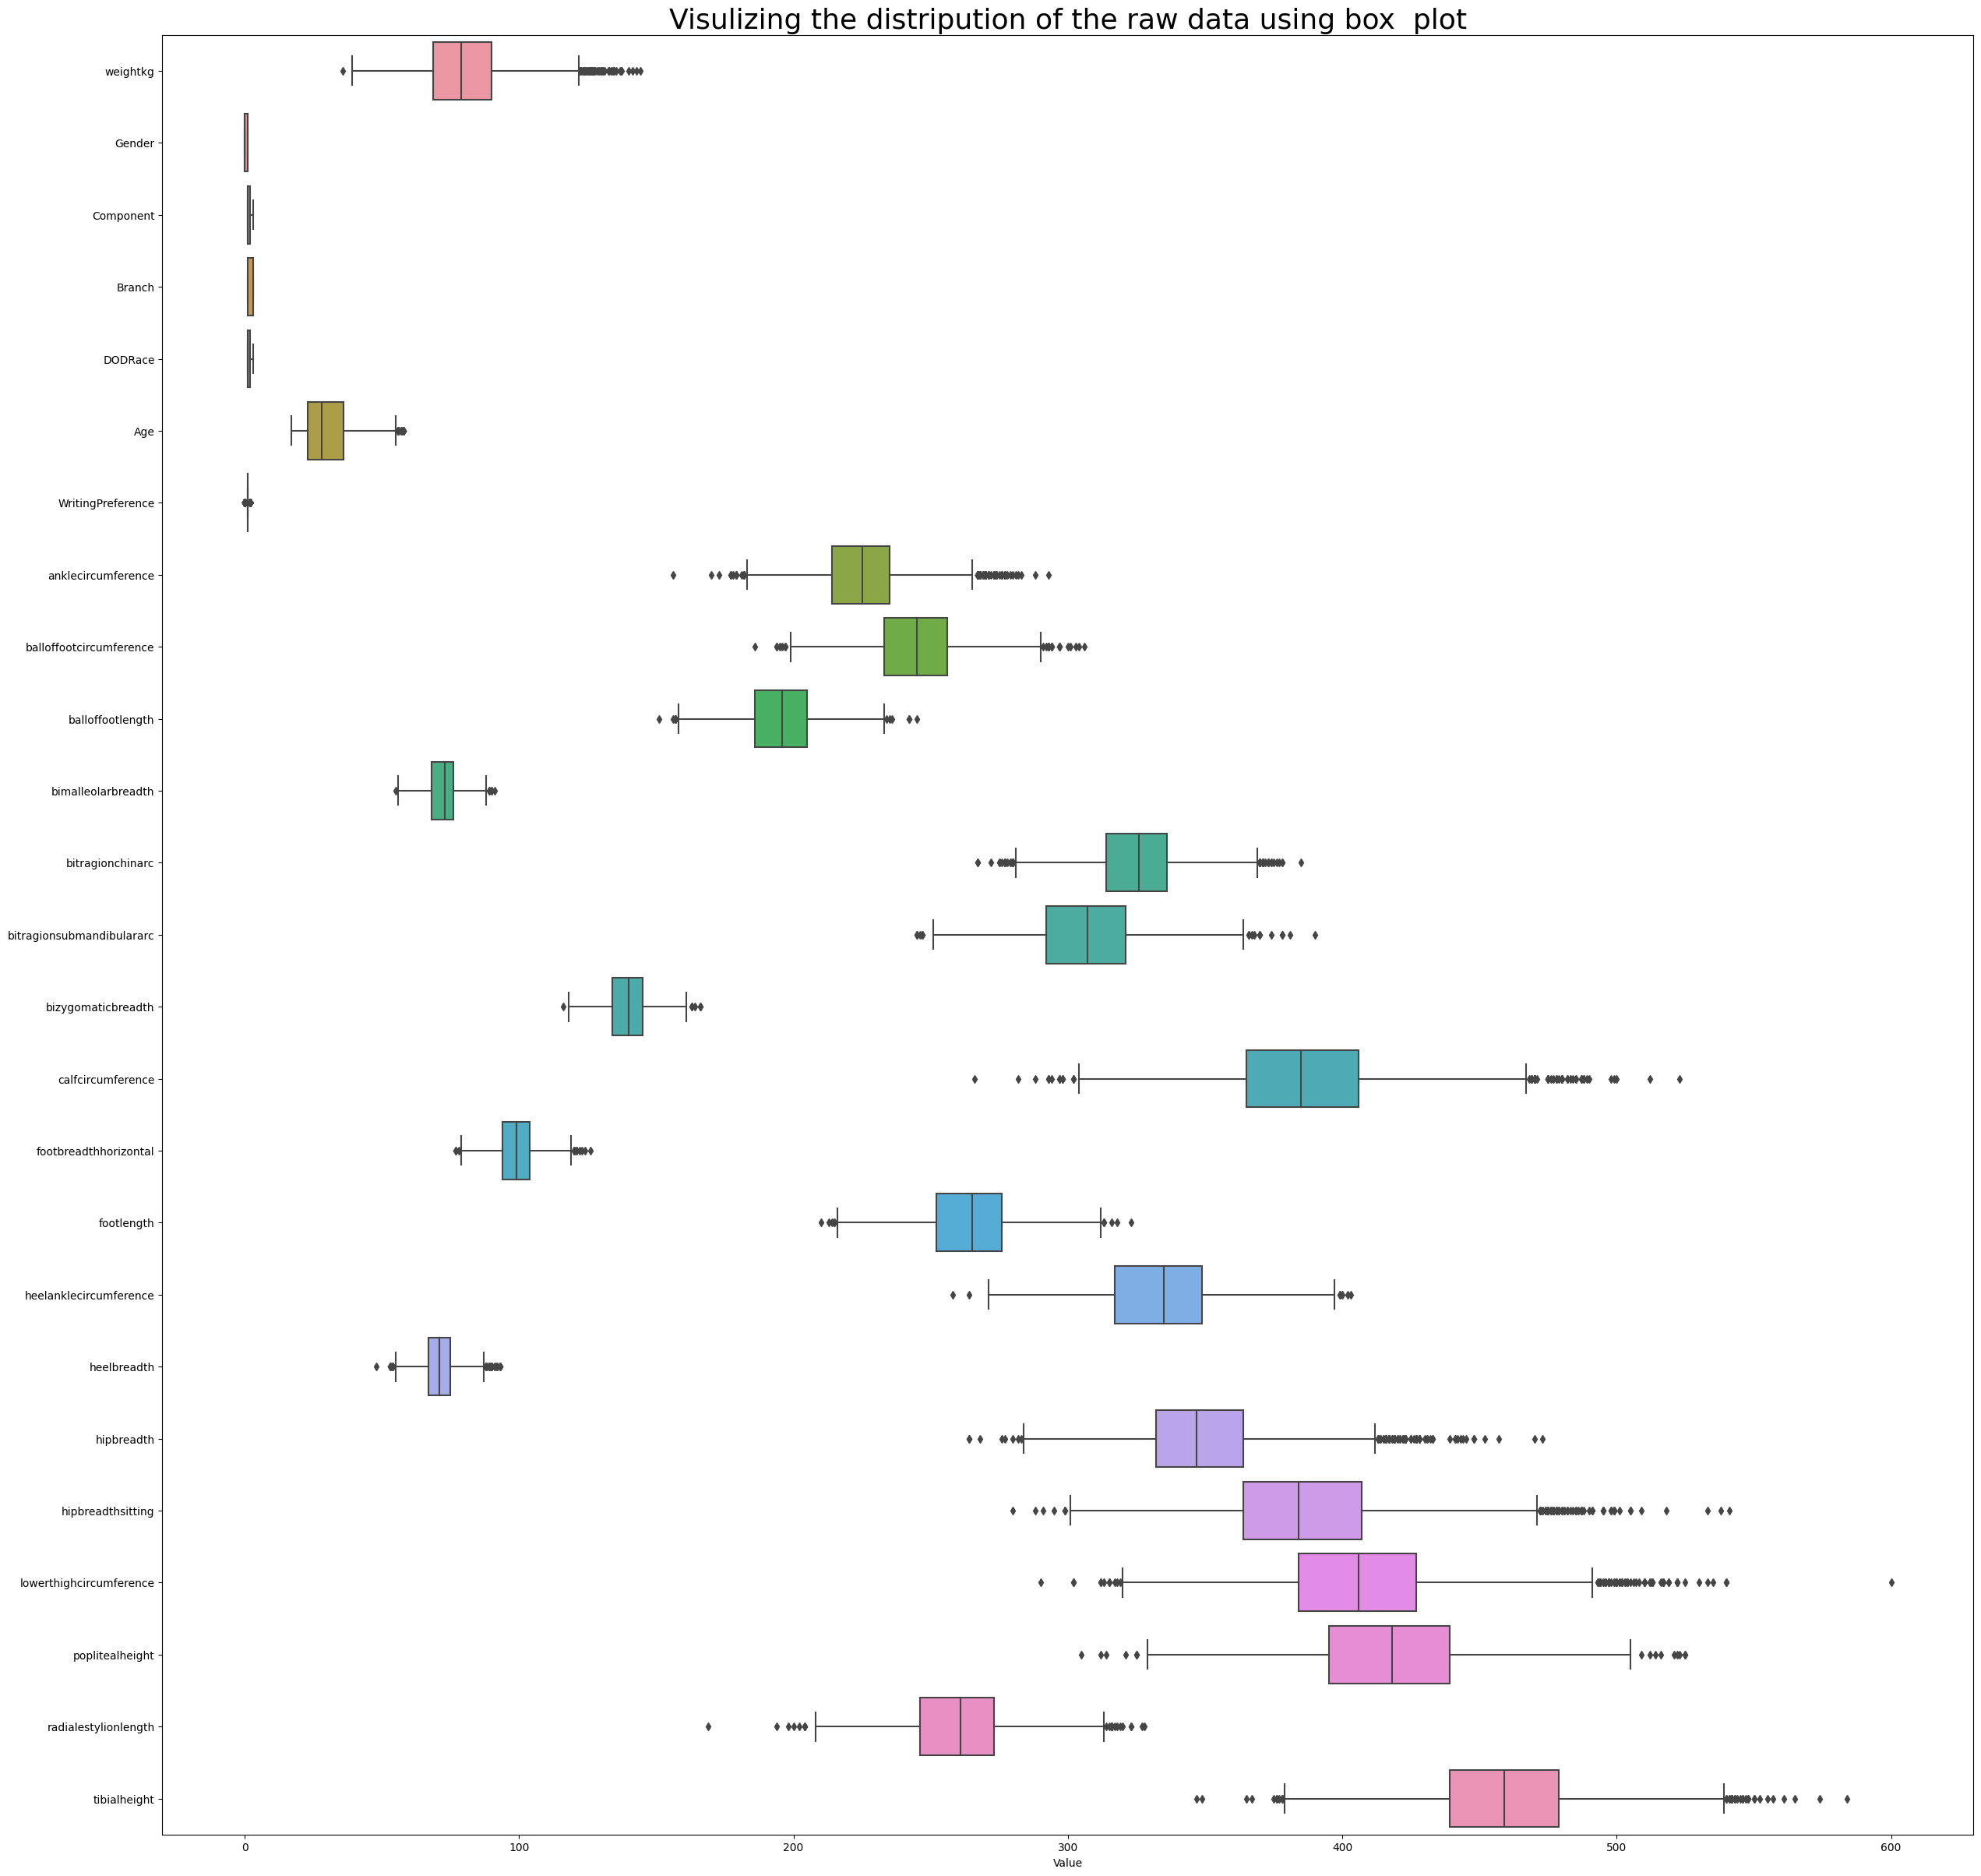

In [76]:
# Create a box plot for all features
plt.figure(figsize=(30,30))  # Adjust the figure size as needed
sns.boxplot(data=pd.concat([other_df.iloc[:, 1:], lower_body_df], axis=0), orient="h")  # Horizontal box plot for all features
plt.title("Visulizing the distripution of the raw data using box  plot", fontsize=26)
plt.xlabel("Value")

# plt.savefig("box_plot_all_features.png")

plt.show()

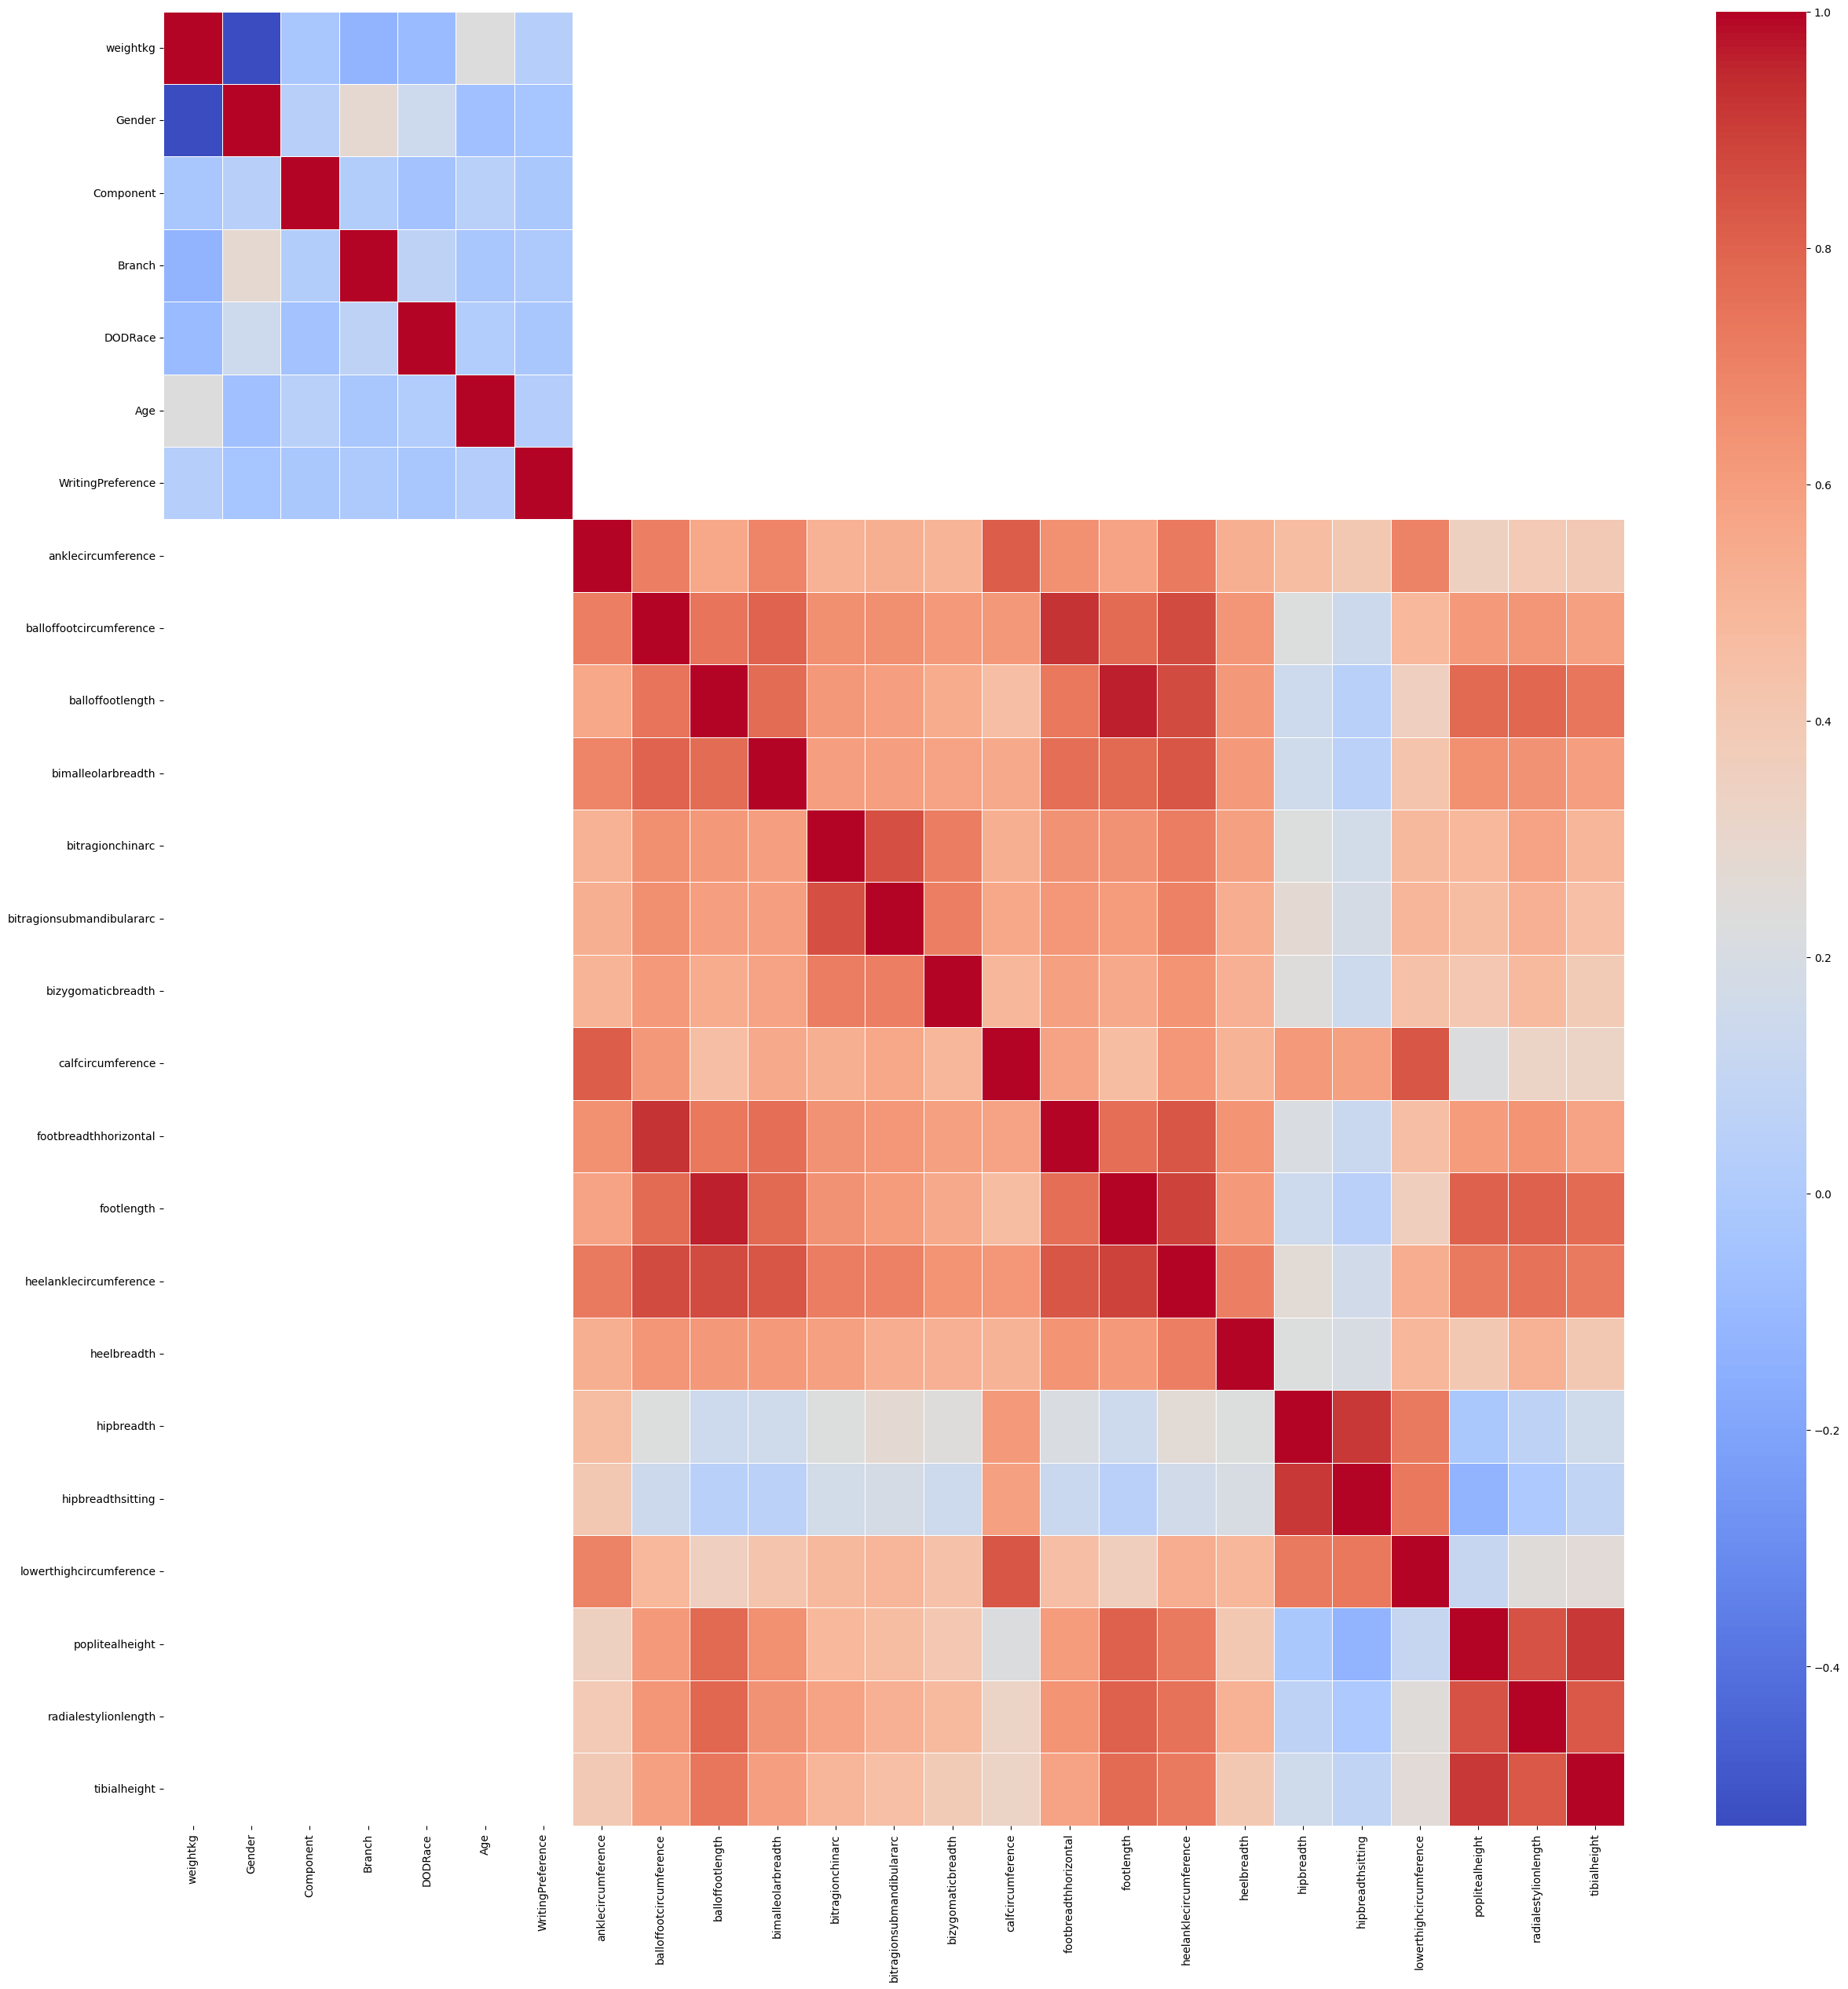

In [79]:
data=pd.concat([other_df.iloc[:, 1:], lower_body_df])
corr_matrix = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.show()

try lasso for top 6 features

3 classes of dodrace

feature scaling by varience

In [ ]:
# Create a box plot for all features
plt.figure(figsize=(30,30))  # Adjust the figure size as needed
sns.violinplot(data=df_w1.iloc[:, 1:10], orient="h", inner="quart")  # Horizontal box plot for all features
plt.title("Visulizing the distripution of the raw data using box  plot", fontsize=26)
plt.xlabel("Value")

# plt.savefig("box_plot_all_features.png")

plt.show()